In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/hess/projects/cmip-gan

/home/hess/projects/cmip-gan


In [ ]:
import os
os.environ['PROJ_LIB'] = '/Users/mb/anaconda3/envs/worklab/share/proj'
import matplotlib.pyplot as plt
from src.plots import PlotAnalysis
from src.configuration import HistoricalConfig
from src.inference import LoadData
from src.utils import spatial_bias, compute_seasonal_bias, compute_bias

In [4]:
config = HistoricalConfig()
config.test_period = ('2004', '2014')
data = LoadData(config).collect_historical_data()
scratch_path = '/home/hess/Data/cmip-gan/results/figures'

Test period ('2004', '2014')


In [ ]:
compute_bias(data, spatial_bias)

print('DJF')
compute_seasonal_bias(data, spatial_bias, 'DJF')

print('MAM')
compute_seasonal_bias(data, spatial_bias, 'MAM')

print('JJA')
compute_seasonal_bias(data, spatial_bias, 'JJA')

print('SON')
compute_seasonal_bias(data, spatial_bias, 'SON')

Target | Model          | Bias
W5E5   | GFDL           | 0.535
W5E5   | GAN            | 0.328
W5E5   | GAN unconst.   | 0.265
W5E5   | GAN-QM     | 0.190
W5E5   | GAN-ISIMIP     | 0.195
W5E5   | QM  | 0.217
DJF
Target | Model  | Bias
W5E5   | GFDL   | bias 0.634
W5E5   | GAN | bias 0.395
W5E5   | GAN  unconst. | bias 0.371
W5E5   | GAN-QM | bias 0.299
W5E5   | GAN-ISIMIP | bias 0.308
W5E5   | QM | bias 0.321
MAM
Target | Model  | Bias
W5E5   | GFDL   | bias 0.722
W5E5   | GAN | bias 0.419
W5E5   | GAN  unconst. | bias 0.378
W5E5   | GAN-QM | bias 0.282
W5E5   | GAN-ISIMIP | bias 0.285
W5E5   | QM | bias 0.314
JJA
Target | Model  | Bias
W5E5   | GFDL   | bias 0.743
W5E5   | GAN | bias 0.451
W5E5   | GAN  unconst. | bias 0.357
W5E5   | GAN-QM | bias 0.277
W5E5   | GAN-ISIMIP | bias 0.280
W5E5   | QM | bias 0.289
SON
Target | Model  | Bias
W5E5   | GFDL   | bias 0.643
W5E5   | GAN | bias 0.409
W5E5   | GAN  unconst. | bias 0.362
W5E5   | GAN-QM | bias 0.296


w5e5
gfdl
custom_isimip
w5e5_gan
w5e5_gan_unconstrained
w5e5_gan_isimip
computing percetile of 0
computing percetile of 25
computing percetile of 50
computing percetile of 75
computing percetile of 100
computing percetile of 125
computing percetile of 150


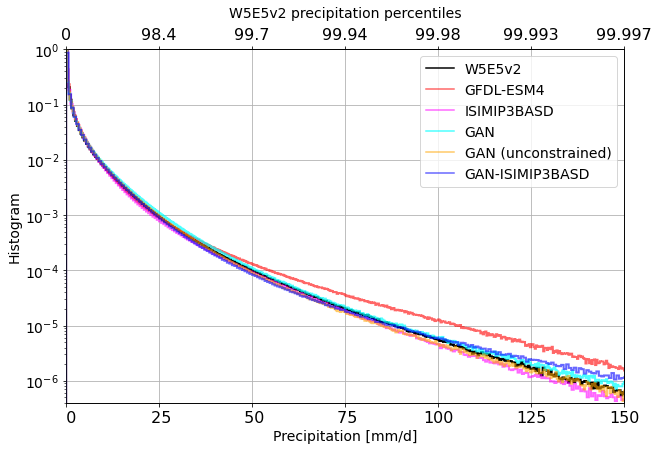

/p/tmp/hess/scratch/cmip-gan/results/figures/global_annual_histograms.pdf


In [48]:
""" GLOBAL """

names = ['w5e5_gan_isimip', 'w5e5_gan_unconstrained', 'w5e5_gan', 'custom_isimip', 'gfdl', 'w5e5']

plot = PlotAnalysis(data, names=names)

fname_hist = f'{scratch_path}/global_annual_histograms.pdf' 
fig = plt.figure(figsize=(10,6.5))
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(111)
plot.histograms(latitude_bounds=None,
                longitude_bounds=None,
                time_bounds=None,
                land_masked=False,
                ax=ax,
                annotate=False,
                sea_masked=False,
                xlim=150,
                ylim=(4e-7, 1.0),
                bins=1000)

plt.savefig(fname_hist, format='pdf', bbox_inches='tight')
plt.show()
print(fname_hist)

w5e5
gfdl
custom_isimip
w5e5_gan
w5e5_gan_unconstrained
w5e5_gan_isimip
computing percetile of 0
computing percetile of 25
computing percetile of 50
computing percetile of 75
computing percetile of 100
computing percetile of 125
computing percetile of 150
gfdl
custom_isimip
w5e5_gan
w5e5_gan_unconstrained
w5e5_gan_isimip


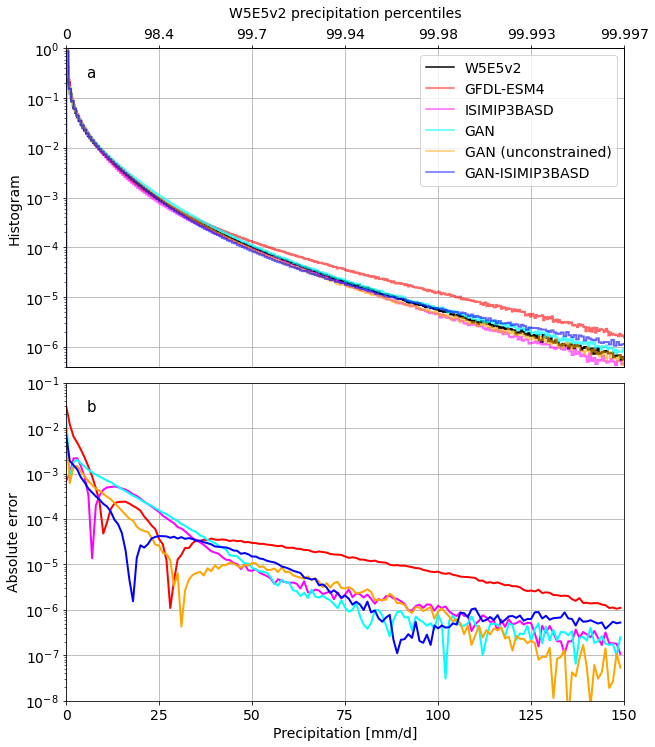

/p/tmp/hess/scratch/cmip-gan/results/figures/global_annual_histograms_combined.pdf


In [47]:
""" GLOBAL """

names = ['w5e5_gan_isimip', 'w5e5_gan_unconstrained', 'w5e5_gan', 'custom_isimip', 'gfdl', 'w5e5']

plot = PlotAnalysis(data, names=names)

fname_hist = f'{scratch_path}/global_annual_histograms_combined.pdf' 
fig = plt.figure(figsize=(10,12))
fig.tight_layout()
plt.rcParams.update({'font.size': 14})

ax = fig.add_subplot(211)
ax.annotate("a", ha="center", va="center", size=15,
                         xy=(1-0.955, 0.925), xycoords=ax,
                         bbox=None)

plot.histograms(latitude_bounds=None,
                longitude_bounds=None,
                time_bounds=None,
                land_masked=False,
                ax=ax,
                annotate=False,
                sea_masked=False,
                xlim=150,
                ylim=(4e-7, 1.0),
                bins=1000)

ax = fig.add_subplot(212)
ax.annotate("b", ha="center", va="center", size=15,
                         xy=(1-0.955, 0.925), xycoords=ax,
                         bbox=None)

plt.subplots_adjust(hspace=0.05)

plot.histogram_distances(log=True,
                           latitude_bounds=None,
                           longitude_bounds=None,
                           time_bounds=None,
                           land_masked=False,
                           sea_masked=False,
                           )

plt.savefig(fname_hist, format='pdf', bbox_inches='tight')
plt.show()
print(fname_hist)

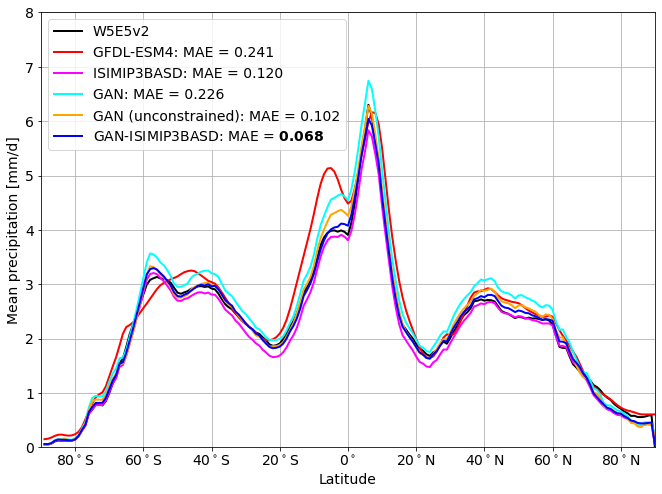

/p/tmp/hess/scratch/cmip-gan/results/figures/annual_lat_mean.pdf


In [17]:
fname_mean = f'{scratch_path}/annual_lat_mean.pdf' 

names = ['w5e5_gan_isimip', 'w5e5_gan_unconstrained', 'w5e5_gan','custom_isimip', 'gfdl', 'w5e5']

plot = PlotAnalysis(data, names=names)
plt.figure(figsize=(11,8))
plt.rcParams.update({'font.size': 14})
plot.latitudinal_mean()
plt.savefig(fname_mean, format='pdf', bbox_inches='tight')
plt.show()

print(fname_mean)

W5E5v2  	 	 MAE: 2.220 [mm/d]
GFDL-ESM4  	 	 MAE: 0.535 [mm/d]
ISIMIP3BASD  	 	 MAE: 0.217 [mm/d]
GAN  	 	 MAE: 0.328 [mm/d]
GAN (unconstrained)  	 	 MAE: 0.265 [mm/d]
GAN-ISIMIP3BASD  	 	 MAE: 0.195 [mm/d]


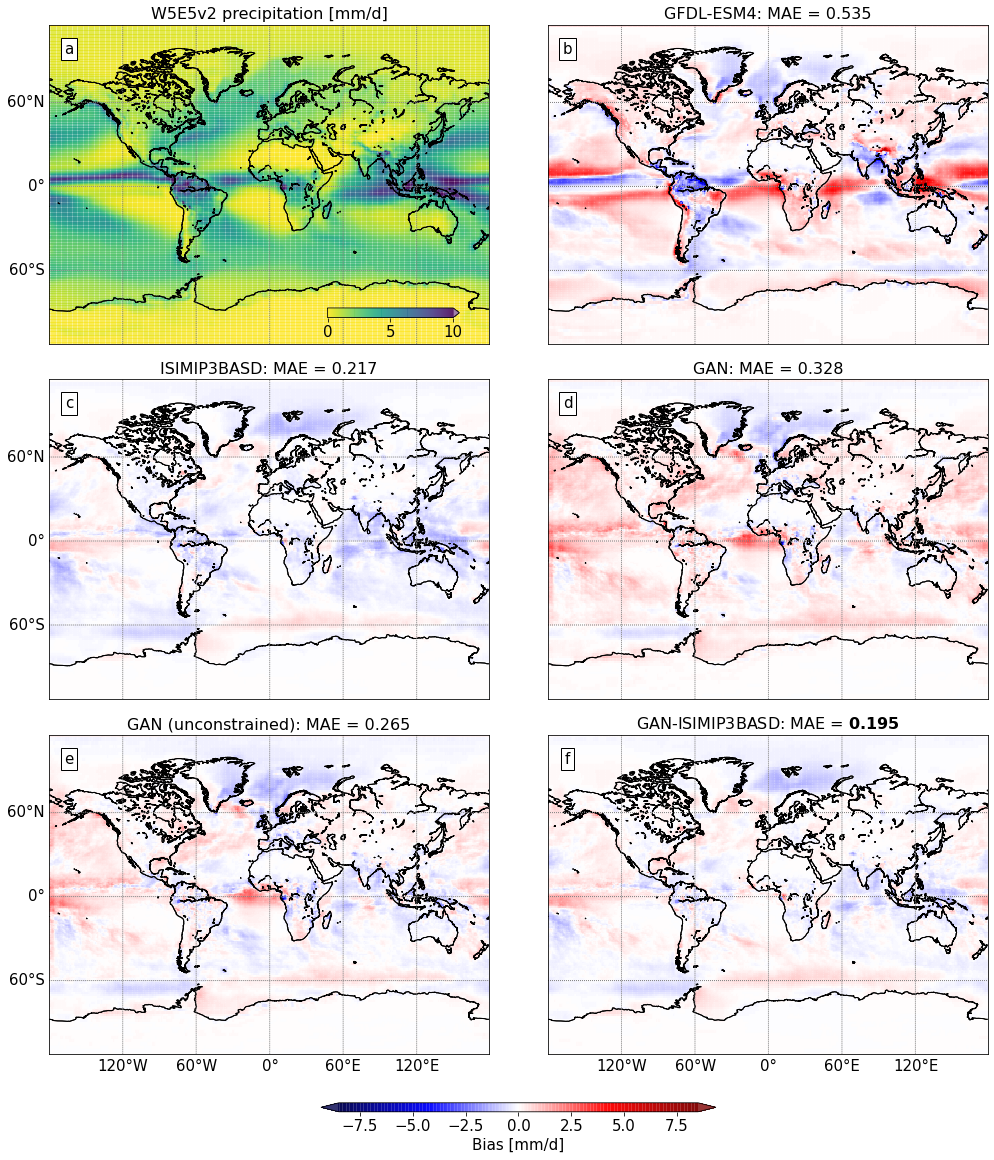

/p/tmp/hess/scratch/cmip-gan/results/figures/bias_map_mae_titles.png


In [5]:
names = ['w5e5', 'gfdl', 'custom_isimip', 'w5e5_gan', 'w5e5_gan_unconstrained', 'w5e5_gan_isimip']

plot = PlotAnalysis(data, names=names)
fname = f'{scratch_path}/bias_map_mae_titles.png' 

plot.bias(fname)
print(fname)

gfdl 2.689
custom_isimip 1.495
w5e5_gan 1.741
w5e5_gan_unconstrained 1.592
w5e5_gan_isimip 1.366


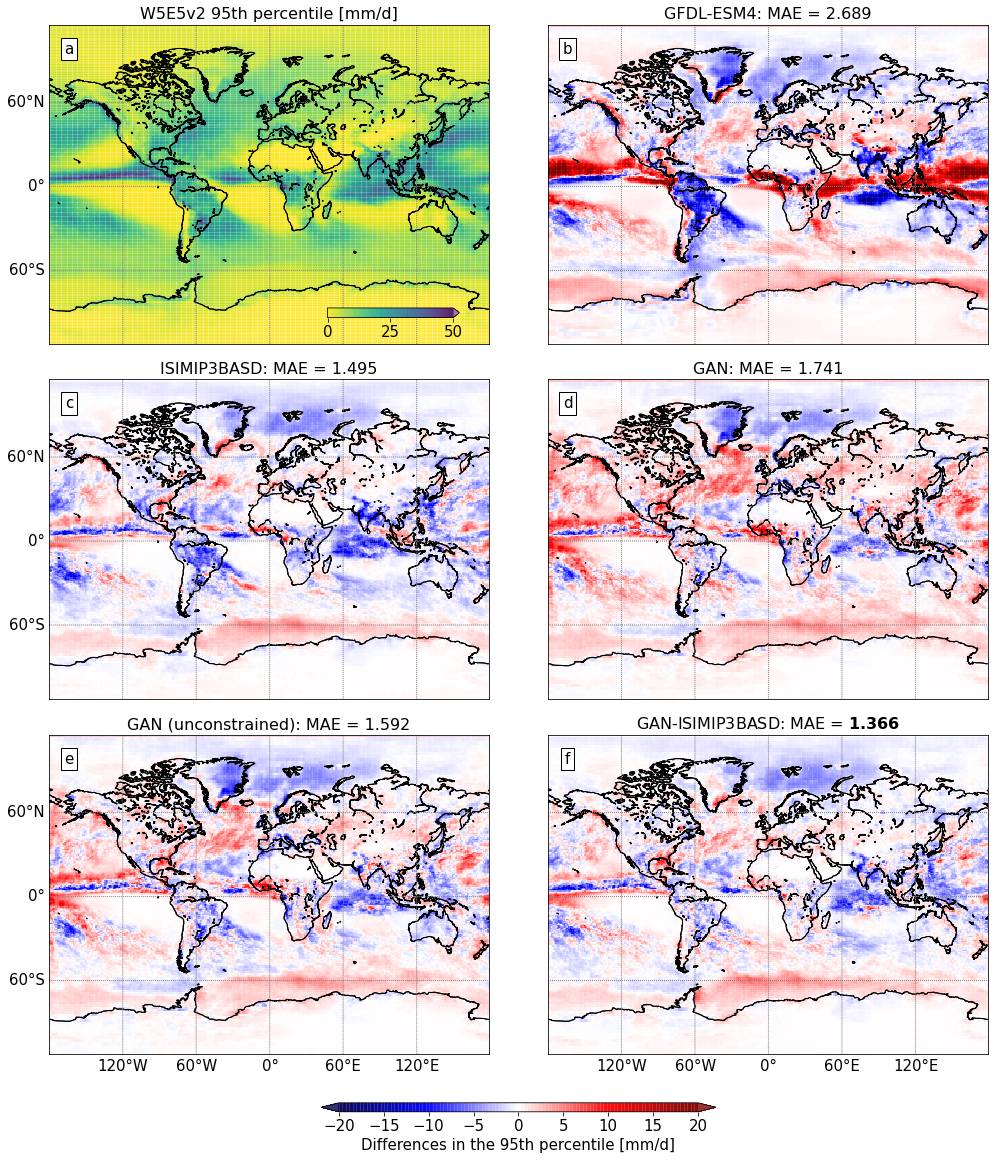

/p/tmp/hess/scratch/cmip-gan/results/figures/extremes_bias_map.png


In [8]:
names = ['w5e5', 'gfdl', 'custom_isimip', 'w5e5_gan', 'w5e5_gan_unconstrained', 'w5e5_gan_isimip']

plot = PlotAnalysis(data, names=names)
fname = f'{scratch_path}/extremes_bias_map.png' 

plot.extremes_bias('w5e5', 0.95, fname, season='SON')
print(fname)

2014-12-21T00:00:00.000000000
lats: (array(-54., dtype=float32), array(16., dtype=float32))
lons: (array(-100., dtype=float32), array(-25., dtype=float32))


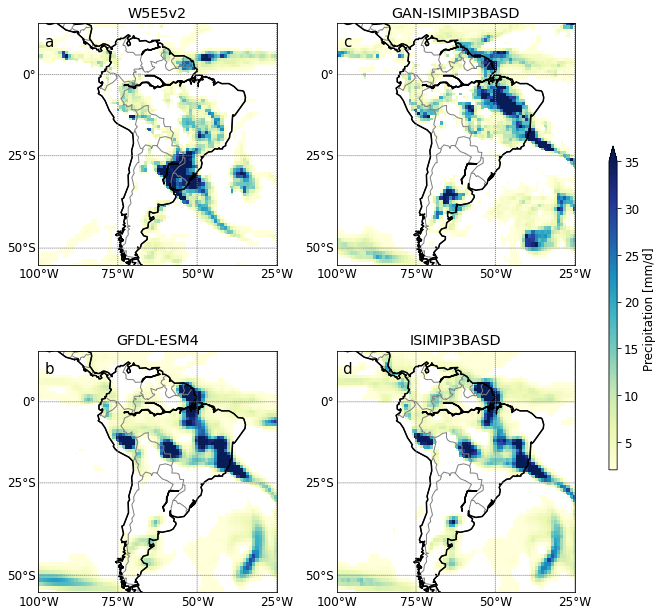

/p/tmp/hess/scratch/cmip-gan/results/figures/single_frame_local.pdf


In [6]:
import warnings
warnings.filterwarnings("ignore")

names = ['w5e5',  'gfdl', 'w5e5_gan_isimip','custom_isimip']
plot = PlotAnalysis(data, names=names)
fname = f'/p/tmp/hess/scratch/cmip-gan/results/figures/single_frame_local.pdf' 
lat_shift = 50
lon_shift = 20
plt.rcParams.update({'xtick.labelsize': 16})
plt.rcParams.update({'font.size': 12})
plot.single_frames_local(cmap='YlGnBu',
                         time_index=-11,
                         mask=True,
                         vmax = 35,
                         vmin = 2,
                         lat_min=data.w5e5.latitude[-15+lat_shift],
                         lat_max=data.w5e5.latitude[55+lat_shift],
                         lon_min=data.w5e5.longitude[60+lon_shift],
                         lon_max=data.w5e5.longitude[135+lon_shift],
                        )

print(f'lats: {data.w5e5.latitude[-15+lat_shift].values, data.w5e5.latitude[55+lat_shift].values}')
print(f'lons: {data.w5e5.longitude[60+lon_shift].values, data.w5e5.longitude[135+lon_shift].values}')

plt.savefig(fname, format='pdf', bbox_inches='tight')
plt.show()
print(fname)

2014-09-28T00:00:00.000000000


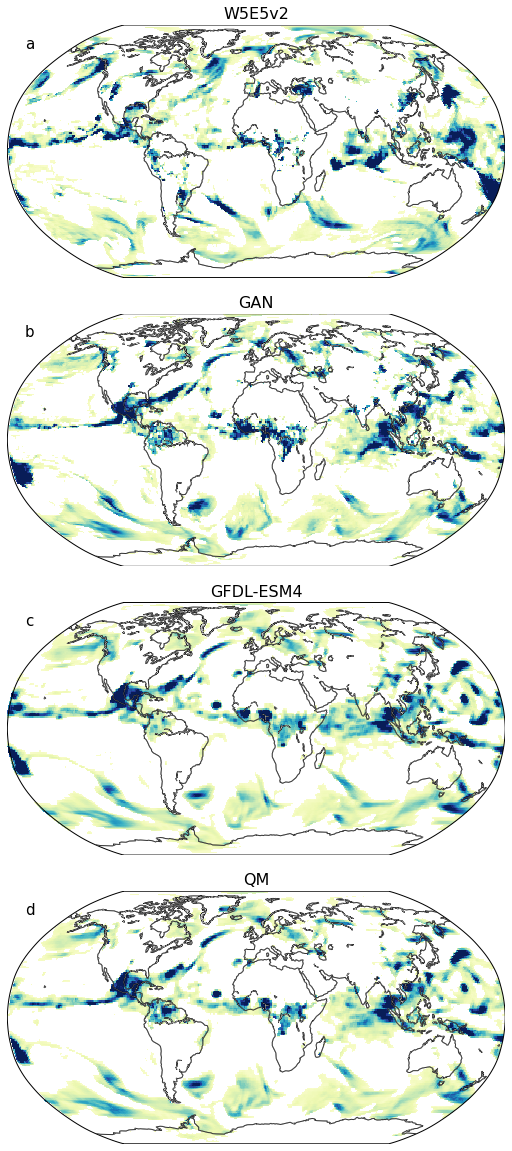

/p/tmp/hess/scratch/cmip-gan/results/figures/single_frame.png


In [11]:
import warnings
warnings.filterwarnings("ignore")

names = ['w5e5', 'w5e5_gan',  'gfdl', 'custom_isimip']
plot = PlotAnalysis(data, names=names)
fname = f'/p/tmp/hess/scratch/cmip-gan/results/figures/single_frame.png' 

plt.rcParams.update({'xtick.labelsize': 18})
plot.single_frames(cmap='YlGnBu', time_index=-95, mask=True)

plt.savefig(fname, format='png', dpi=300, bbox_inches='tight')

plt.show()
print(fname)